# 0. Setup Paths

In [2]:
import os

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 68278, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 68278 (delta 8), reused 14 (delta 6), pack-reused 68258
Receiving objects: 100% (68278/68278), 576.53 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (47970/47970), done.


In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 6.9 MB/s 
     |████████████████████████████████| 352 kB 52.4 MB/s 
     |████████████████████████████████| 1.8 MB 50.3 MB/s 
     |████████████████████████████████| 23.1 MB 66.3 MB/s 
     |████████████████████████████████| 47.7 MB 1.4 MB/s 
     |████████████████████████████████|

In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-12-29 20:32:36.321251: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1229 20:32:36.761942 139875913648000 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.01s
I1229 20:32:37.081470 139875913648000 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 3.01s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.63s
I1229 20:32:37.709105 139875913648000 test

In [ ]:
#!pip install tensorflow --upgrade

In [ ]:
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3
Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Successfully uninstalled matplotlib-3.2.2
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 12.4 MB 18.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [11]:
import object_detection

In [12]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
apache-beam                   2.34.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
avro-python3                  1.9.2.1
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca   

In [13]:
#Downlaod the pretrained model (ssd mobilenet v2 ) that we'll use for object detection (we'll just fine tune this model on our data)

if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-12-29 20:34:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.157.128, 2404:6800:4008:c13::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.157.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  58.0MB/s    in 0.3s    

2021-12-29 20:34:19 (58.0 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

# 2. Create Label Map

In [14]:
# We have only 1 object 'licence' in our images
#labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]
labels = [{'name':'licence', 'id':1}]


with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [15]:
# OPTIONAL ( USE IF RUNNING ON COLAB )
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [16]:
#download generatetfrecord.py script. This script will convert our images, annotations to tfrecord format needed by tfod
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [17]:
#use the script to convert our images, annotations to tfrecord format needed by tfod
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

#We are getting errors because the annotations we downlaoded from kaggle is slightly different from our expectation.
#Script is looking for bounding box in the 4th member of <object> tag but for our annotations, bounding box is stored in the 5th member of <object> tag
#So we make the index change in our script and then run the cell again.

Traceback (most recent call last):
  File "Tensorflow/scripts/generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "Tensorflow/scripts/generate_tfrecord.py", line 155, in main
    examples = xml_to_csv(args.xml_dir)
  File "Tensorflow/scripts/generate_tfrecord.py", line 88, in xml_to_csv
    int(member[4][0].text),
IndexError: child index out of range
Traceback (most recent call last):
  File "Tensorflow/scripts/generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, ar

In [22]:
#use the script to convert our images, annotations to tfrecord format needed by tfod
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [23]:
#Copy the configuration file of the pretained model we downloaded into models/my_ssd_mobnet folder. 

if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

#We will then specify some paths inside this pipeline.config file before we begin our fine tuning

# 5. Update Config File For Transfer Learning

In [24]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [25]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [26]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [27]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [28]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [29]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [30]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [31]:
config
# all the paths have been specified now.

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "Tensorflow/workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "Tensorflow/workspace/annotations/test.record"
 },
 'eval_input_configs': [label_map_path: "Tensorflow/workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "Tensorflow/workspace/annotations/test.record"
 }
 ],
 'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.00999999977648258

# 6. Train the model

In [32]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [36]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [37]:
#training command generated
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [38]:
!{command}

Traceback (most recent call last):
  File "Tensorflow/models/research/object_detection/model_main_tf2.py", line 32, in <module>
    from object_detection import model_lib_v2
  File "/usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py", line 29, in <module>
    from object_detection import eval_util
  File "/usr/local/lib/python3.7/dist-packages/object_detection/eval_util.py", line 36, in <module>
    from object_detection.metrics import lvis_evaluation
  File "/usr/local/lib/python3.7/dist-packages/object_detection/metrics/lvis_evaluation.py", line 23, in <module>
    from lvis import results as lvis_results
  File "/usr/local/lib/python3.7/dist-packages/lvis/__init__.py", line 5, in <module>
    from lvis.vis import LVISVis
  File "/usr/local/lib/python3.7/dist-packages/lvis/vis.py", line 1, in <module>
    import cv2
  File "/usr/local/lib/python3.7/dist-packages/cv2/__init__.py", line 9, in <module>
    from .cv2 import _registerMatType
ImportError: cannot import

In [39]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/cv2/config-3.py
    /usr/local/lib/python3.7/dist-packages/cv2/config.py
    /usr/local/lib/python3.7/dist-packages/cv2/cv2.abi3.so
    /usr/local/lib/python3.7/dist-packages/cv2/gapi/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/load_config_py2.py
    /usr/local/lib/python3.7/dist-packages/cv2/load_config_py3.py
    /usr/local/lib/python3.7/dist-packages/cv2/mat_wrapper/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/misc/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/misc/version.py
    /usr/local/lib/python3.7/dist-packages/cv2/utils/__init__.py
    /usr/local/lib/python3.7/dist-packages/cv2/version.py
Proceed (y/n)? y
  Successfull

In [40]:
!pip install opencv-python

     |████████████████████████████████| 60.4 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [41]:
!{command}

2021-12-29 21:38:49.220982: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1229 21:38:49.225666 140671450285952 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I1229 21:38:49.233910 140671450285952 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1229 21:38:49.234105 140671450285952 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1229 21:38:49.293060 140671450285952 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experime

# 7. Evaluate the Model

In [42]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [43]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [44]:
!{command}

W1229 22:14:55.052962 139647490119552 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1229 22:14:55.053245 139647490119552 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1229 22:14:55.053382 139647490119552 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1229 22:14:55.053526 139647490119552 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1229 22:14:55.053699 139647490119552 model_lib_v2.py:1111] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-12-29 22:14:55.624605: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

# 8. Load Train Model From Checkpoint

In [6]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [7]:
# Prevent GPU complete consumption to Tf because we want EasyOCR (pytorch) to get some GPU as well

gpus = tf.config.list_physical_devices('GPU') #get list of gpu devices
if gpus:
    try: 
        tf.config.experimental.set_virtual_device_configuration(
            #gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)]) #set memory limit for tf consuming the gpu
            gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)]) #set memory limit for tf consuming the gpu
    
    except RunTimeError as e:
        print(e)

In [8]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial() #specify checkpoint created after training

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [11]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars427.png') #specify image in test directory

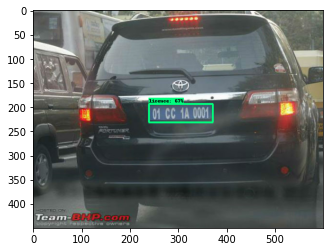

In [12]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.65, #threshold for confidence level
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [14]:
detections

{'detection_anchor_indices': array([ 4443,  9134, 10860,  3242,  9182,  3800,  8901, 11906,  9153,
         3896,   737, 11786,  4040,  3482,  9428,  1926, 10741,  3244,
        12677,  7440,  7204,  4564,  9374,  1922,  6964,  7444,  7200,
        12770,  3844, 12765,  8892,   736,  3807,  4080, 12800,  4084,
         6724,  4324,  4320,  6482,  1686, 12801,  4804,  3840,  3486,
         3485,  6500,  2162,  3489,  4560,  9393, 10624,  6484,  8893,
         4334,  7680,  3000, 12752, 12754,  3230,  6720,  6960,  1682,
        12751,  7684,  1924,  3604,   490,  4422, 11918,  4800,  3231,
         3243,  9386,  2392,  6494,  1940,  1684, 10730,  3600,  6268,
         4142,  6240,  9375,  3965,     2,  5044,  2180,  4094, 10745,
         5348, 10984,  6512,  4922,  4696,  2170, 11930,  4215,  5040,
         4208], dtype=int32),
 'detection_boxes': array([[0.43252388, 0.3990696 , 0.51540524, 0.6208176 ],
        [0.9289465 , 0.        , 0.98799634, 0.17983828],
        [0.42650497, 0.413

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Successfully uninstalled opencv-python-headless-4.5.5.62


In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

#won't run on colab

In [59]:
#Create zip file for your Tensorflow folder which can be then downloaded to local system
!zip -r Tensorflow.zip Tensorflow/ 

  adding: Tensorflow/ (stored 0%)
  adding: Tensorflow/scripts/ (stored 0%)
  adding: Tensorflow/scripts/generate_tfrecord.py (deflated 68%)
  adding: Tensorflow/scripts/.git/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/info/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/07/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/07/bf1b9178bb4e9e48ec2dae8ec89269a5c44e54 (stored 0%)
  adding: Tensorflow/scripts/.git/objects/07/d3e8d86415fa96ac86ac3c72cf999eac96b74b (stored 0%)
  adding: Tensorflow/scripts/.git/objects/ca/ (stored 0%)
  adding: Tensorflow/scripts/.git/objects/ca/ad456d8bd86613a9aa74ccb6e934862c8e584a (stored 0%)
  adding: Tensorflow/scripts/.git/objects/pack/ (stored 0%)
  adding: Tensorflow/scripts/.git/logs/ (stored 0%)
  adding: Tensorflow/scripts/.git/logs/HEAD (deflated 27%)
  adding: Tensorflow/scripts/.git/logs/refs/ (stored 0%)
  adding: Tensorflow/scripts/.git/logs/refs/remotes/ (stored 0%)


In [68]:
#from google.colab import files
#files.download("Tensorflow.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
#Copy to Google Drive
!cp "/content/Tensorflow.zip" "/content/drive/My Drive/Tensorflow.zip"

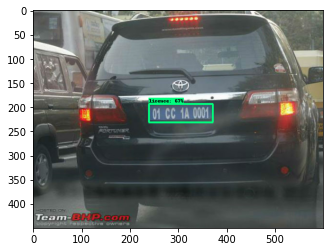

In [16]:
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))

In [17]:
image_np_with_detections

array([[[155, 155, 155],
        [156, 156, 156],
        [158, 158, 158],
        ...,
        [102, 121, 112],
        [108, 127, 118],
        [109, 128, 119]],

       [[151, 151, 151],
        [152, 152, 152],
        [154, 154, 154],
        ...,
        [102, 121, 112],
        [104, 123, 114],
        [104, 123, 114]],

       [[140, 140, 140],
        [141, 141, 141],
        [143, 143, 143],
        ...,
        [109, 128, 119],
        [106, 125, 116],
        [101, 120, 111]],

       ...,

       [[ 91,  93,  87],
        [ 95,  97,  91],
        [104, 106, 100],
        ...,
        [ 97,  99,  93],
        [ 94,  96,  90],
        [ 89,  91,  85]],

       [[ 93,  94,  90],
        [ 93,  94,  90],
        [ 93,  94,  90],
        ...,
        [ 92,  93,  91],
        [ 91,  92,  90],
        [ 90,  91,  89]],

       [[ 97,  98,  94],
        [ 97,  98,  94],
        [ 97,  98,  94],
        ...,
        [ 98,  99,  97],
        [ 98,  99,  97],
        [ 94,  95,  93]]

# Apply OCR to Detection using EasyOCR Library

In [64]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 1.3 MB/s 
  Using cached opencv_python_headless-4.5.5.62-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.7 MB)


In [20]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:15tcmalloc: large alloc 1147494400 bytes == 0x562b9a73e000 @  0x7fa1d3532615 0x562b603da4cc 0x562b604ba47a 0x562b603dd2ed 0x562b604cee1d 0x562b60450e99 0x562b6044b9ee 0x562b603debda 0x562b60450d00 0x562b6044b9ee 0x562b603debda 0x562b6044d737 0x562b604cfc66 0x562b6044cdaf 0x562b604cfc66 0x562b6044cdaf 0x562b604cfc66 0x562b6044cdaf 0x562b603df039 0x562b60422409 0x562b603ddc52 0x562b60450c25 0x562b6044b9ee 0x562b603debda 0x562b6044d737 0x562b6044b9ee 0x562b603debda 0x562b6044c915 0x562b603deafa 0x562b6044cc0d 0x562b6044b9ee
     |█████████████████               | 1055.7 MB 1.4 MB/s eta 0:10:47tcmalloc: large alloc 1434370048 bytes == 0x562bded94000 @  0x7fa1d3532615 0x562b603da4cc 0x562b604ba47a 0x562b603dd2ed 0x562b604cee1d 0x562b60450e99 0x562b6044b9ee 0x562b603debda 0x562b60450d00 0x562b6044b9ee 0x562b603debda 0x562b6044d737 0x562b604cfc66 0x562b6044cd

In [15]:
import easyocr

In [16]:
detection_threshold = 0.6 #threshold for detecting number plates

In [17]:
detections['detection_scores']

array([0.66715354, 0.20081212, 0.14907697, 0.14408238, 0.13877983,
       0.12648238, 0.12287451, 0.09788711, 0.08003917, 0.07059156,
       0.0693647 , 0.06869463, 0.06462189, 0.06099716, 0.0525496 ,
       0.04899869, 0.04803377, 0.04713181, 0.04614797, 0.04614428,
       0.04338791, 0.04318788, 0.04301474, 0.04295496, 0.0422099 ,
       0.04195785, 0.04185869, 0.04177428, 0.04156653, 0.04083645,
       0.04013511, 0.03978484, 0.03963403, 0.03945014, 0.03889916,
       0.03886922, 0.03824694, 0.03782392, 0.0378058 , 0.03747999,
       0.03693042, 0.03691256, 0.03684153, 0.03678501, 0.03666521,
       0.0356346 , 0.03512301, 0.03428896, 0.03407116, 0.03393907,
       0.0338942 , 0.03345196, 0.0328256 , 0.03277012, 0.03267445,
       0.03245968, 0.03244172, 0.03227699, 0.03218051, 0.03188635,
       0.03177123, 0.03172839, 0.03154331, 0.03142197, 0.03111912,
       0.03095118, 0.03046693, 0.02994348, 0.02970269, 0.02969414,
       0.02949069, 0.0290946 , 0.02896918, 0.02841902, 0.02832

In [18]:
detections['detection_scores'] > detection_threshold

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [19]:
#get the image, box, score, class for all detections that passed this threshold

image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [20]:
classes

array([0])

In [21]:
scores

[0.66715354]

In [22]:
boxes

array([[0.43252388, 0.3990696 , 0.51540524, 0.6208176 ]], dtype=float32)

In [23]:
width = image.shape[1]
height = image.shape[0]

In [24]:
width, height

(600, 450)

In [ ]:
# Apply ROI filtering and OCR on top of all bounding boxes detected from image (above image has only 1)

for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width] #get region of interest (full number plate) scaled to image size cordinates
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])] #get only the region from our image that corresponds to ROI (has the numbers)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

    #apply OCR
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region) #apply OCR in the region 
    print(ocr_result)
    

[0.43252388 0.3990696  0.51540524 0.6208176 ]
[194.63574439 239.44176435 231.93235695 372.49056101]


In [ ]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

In [89]:
#ocr_result[0]
#ocr_result[1]

# OCR Filtering

OCR results won't be good if there is extra text in the detected number plate. E.g. Words that constitute the name of state/city will also get detected due to OCR. We need a filtering alorithm to solve this problem. We need to remove extra text that is detected.

In [ ]:
region_threshold = 0.6

In [ ]:
#We'll filter the OCR detections based on size. Larger size detections will usually be the numbers we are interested in. So let's filter these.

def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if (length*height / rectangle_size) > region_threshold: #if the detected text is big enough as threshold % of size of region
            plate.append(result[1])
    return plate

In [ ]:
filter_text(region, ocr_result, region_threshold)

# Bring it Together

In [ ]:
region_threshold = 0.6

In [ ]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region


In [ ]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

#Save Results into CSV

In [ ]:
import csv
import uuid #to uniquely name each detected image

In [ ]:
'{}.jpg'.format(uuid.uuid1())

In [ ]:
def save_results(text, region, csv_filename, folder_path):

    img_name = '{}.jpg'.format(uuid.uuid1()) #create unique image name
    
    cv2.imwrite(os.path.join(folder_path, img_name), region) #save detected image to folder
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text]) #save image name and text detected to csv

In [ ]:
region

In [ ]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 11. Real Time Detections + OCR from your Webcam

In [57]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    # apply ocr and save results
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

#won't run on colab